# Assignment 1
I have calculated the survival rate using the implementation of the Naive Bayes and K-Nearest Neighbours algorithms from scratch in Python using Numpy and Pandas and Matplotlib for visualization. 
The algorithm is be implemented as a function with arguments, x_train (the features) and y_train (the output).

# We will begin by importing the lib for visualisation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Reading the data for training and test

In [2]:
# we have added the training data as the titanic data along with its address
titanic_data = pd.read_csv('Data/train.csv')

In [3]:
# we have printed the training data but only the head part which has 0 to 5 rows only
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# we have added the testing data as the titanic test along with its address
titanic_test = pd.read_csv('Data/test.csv')

In [5]:
# we have printed the testing data but only the head part which has 0 to 5 rows only
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# This combines both datasets for unified preprocessing which will help us in doing the same transformation in both
df = pd.concat([titanic_data, titanic_test], ignore_index=True, sort = False) 

The following section of code is used for sets up visual styling for plots using the Seaborn library. This all parameters will be used for better visualization.

In [7]:
# Sets runtime configuration (RC) parameters for matplotlib
plt.rcParams.update({
    'figure.figsize': (8, 4),
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.grid': True,
    'grid.color': '.9',
    'grid.linestyle': '-',
    'axes.linewidth': 1.0,
    'font.size': 10
})

# Defines a custom color palette using hex color codes.
custom_colors = ["#3498db", "#95a5a6", "#34495e", "#2ecc71", "#e74c3c"]

# DATA ANALYSIS 
# Firstly we will use the correlation Heatmap to understand and analysis the train data
We can see in the map that the more negative ones which is the pclass has a correlation with survival and that is <b> lower the pclass higher is the survival. </b> Along with pclass we can see the fare price which also has the relation which is <b> higher fare price more survival.</b> Zero means no correlation at all and one means it it purely correlated.

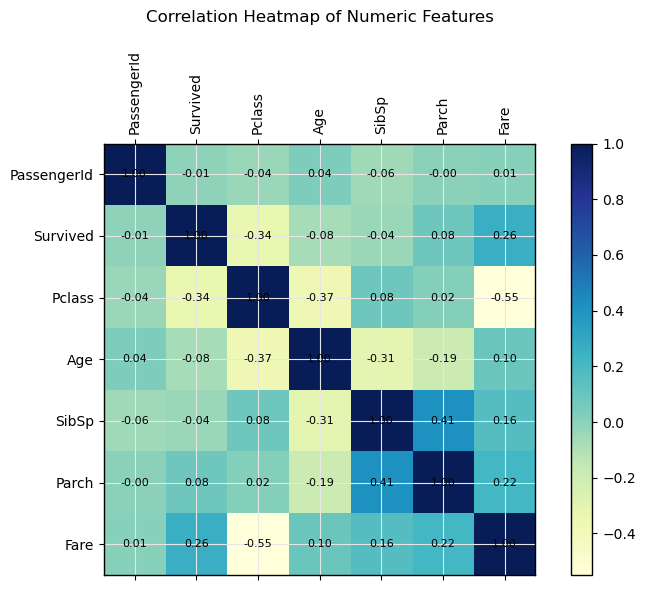

In [8]:
# Filter only numeric columns
numeric_data = titanic_data.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr_matrix, cmap="YlGnBu")  

# Add colorbar
plt.colorbar(cax)

# Set axis ticks and labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

# Annotate the cells with correlation values
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        value = corr_matrix.iloc[i, j]
        ax.text(j, i, f"{value:.2f}",  va='center', ha='center',color='black', fontsize=8)

plt.title("Correlation Heatmap of Numeric Features", pad=20)
plt.tight_layout()
plt.show()

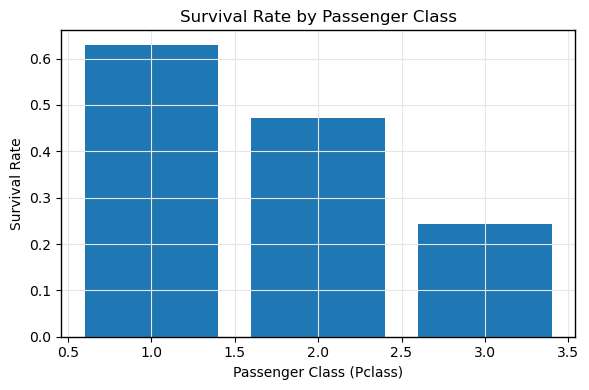

In [9]:
# Calculate the mean survival rate per Pclass
grouped_data = titanic_data.groupby("Pclass")["Survived"].mean().reset_index()

# Plot using Matplotlib
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(grouped_data["Pclass"], grouped_data["Survived"])

# Labeling
ax.set_xlabel("Passenger Class (Pclass)")
ax.set_ylabel("Survival Rate")
ax.set_title("Survival Rate by Passenger Class")

plt.tight_layout()
plt.show()

<b> This graph also proves that the survival chances of a class-1 traveler were higher than a class-2 and class-3 traveler </b>

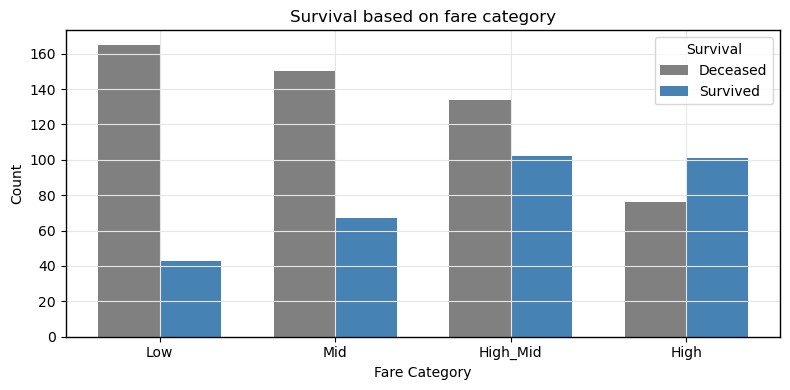

In [10]:
# We Created Fare_Category with defined bins and labels
df['Fare_Category'] = pd.cut(df['Fare'], 
                             bins=[0, 7.90, 14.45, 31.28, 120], 
                             labels=['Low', 'Mid', 'High_Mid', 'High'])

# Count values grouped by Fare_Category and Survived — pass `observed=True` to avoid warning
count_data = df.groupby(['Fare_Category', 'Survived'], observed=True).size().unstack(fill_value=0)

# Set up bar plot parameters
categories = count_data.index
x = range(len(categories))
bar_width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Plot Deceased (Survived == 0)
ax.bar([i - bar_width/2 for i in x], count_data[0], width=bar_width, label='Deceased', color='gray')

# Plot Survived (Survived == 1)
ax.bar([i + bar_width/2 for i in x], count_data[1], width=bar_width, label='Survived', color='steelblue')

# Customize plot
ax.set_xlabel("Fare Category")
ax.set_ylabel("Count")
ax.set_title("Survival based on fare category")
ax.set_xticks(list(x))
ax.set_xticklabels(categories)
ax.legend(title="Survival")

plt.tight_layout()
plt.show()



<b> It is clear that there is a strong correlation between the fare and the survival. 
The higher a tourist paid, the higher would be his chances to survive.</b>


# Secondly we will see the how the sex is related with the pclass and survival
Roughly around 65% of the tourists were male while the remaining 35% were female. However, <b> the percentage of female survivors was higher than the number of male survivors.</b>More than <b> 80% male passengers had to die as compared to around 70% female passengers.</b>
We can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.
<b> It is evident that irrespective of Pclass, Women were given first priority while rescue.</b> Even Men from Pclass1 have a very low survival rate.

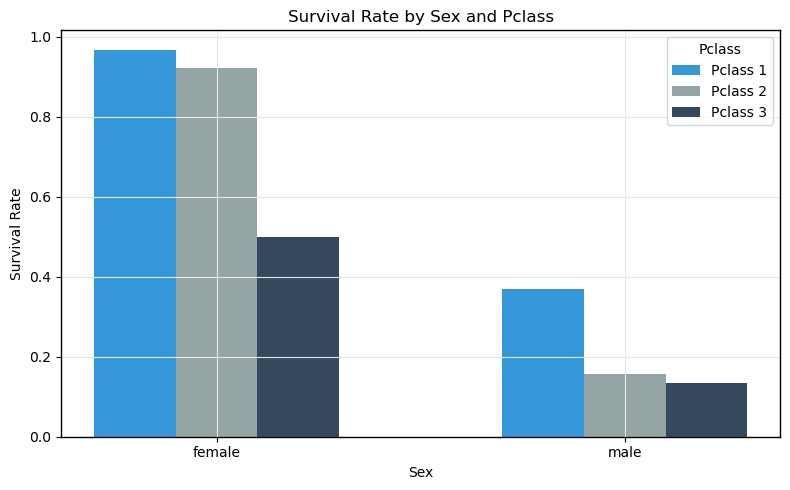

In [11]:
# Group and calculate mean survival rate for each combination of Sex and Pclass
grouped = titanic_data.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()

# Set up variables
sexes = grouped.index.tolist()
pclasses = grouped.columns.tolist()
x = np.arange(len(sexes))
bar_width = 0.2

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#3498db', '#95a5a6', '#34495e']  # Optional color palette

# Plot each Pclass separately
for i, pclass in enumerate(pclasses):
    offset = (i - len(pclasses)/2) * bar_width + bar_width/2
    ax.bar(x + offset, grouped[pclass], width=bar_width, label=f'Pclass {pclass}', color=colors[i])

# Axis labels and ticks
ax.set_xticks(x)
ax.set_xticklabels(sexes)
ax.set_ylabel("Survival Rate")
ax.set_xlabel("Sex")
ax.set_title("Survival Rate by Sex and Pclass")
ax.legend(title="Pclass")

plt.tight_layout()
plt.show()


# Then we will analysis the age factor 
Apparently, <b> higher number of children below age 10 were saved than died.</b> For every other age group, the number of casualities was higher than the number of survivors.<b> More than 140 people within the age group 20 and 30 were dead as compared to just around 80 people of the same age range sustained.</b>

In [12]:
pd.DataFrame(df.Age.describe())

,Age
count,1046.000000
mean,29.881138
std,14.413493
min,0.170000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


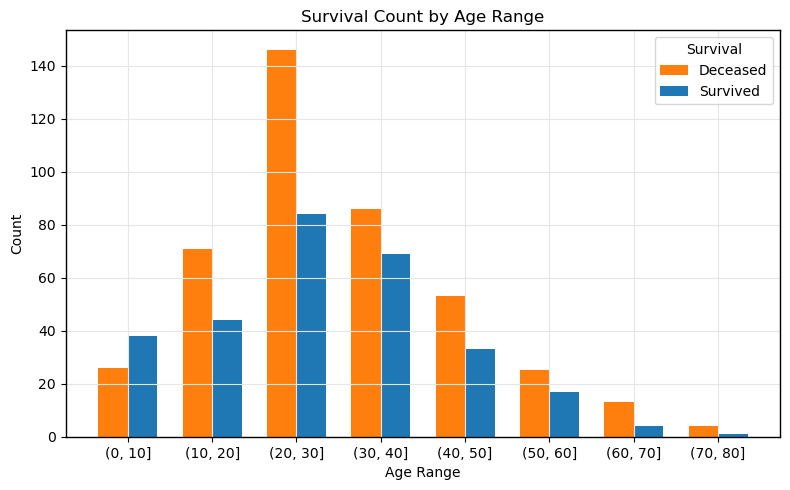

In [13]:
df['Age_Range'] = pd.cut(df['Age'], [0, 10, 20, 30, 40, 50, 60, 70, 80])

# Count occurrences for each Age_Range and Survived value
count_data = df.groupby(['Age_Range', 'Survived'], observed=True).size().unstack(fill_value=0)

# Prepare positions and labels
categories = count_data.index.tolist()
x = np.arange(len(categories))
bar_width = 0.35

# Plot the graph
fig, ax = plt.subplots(figsize=(8, 5))

# Deceased (Survived == 0)
ax.bar(x - bar_width/2, count_data[0], width=bar_width, color='C1', label='Deceased')

# Survived (Survived == 1)
ax.bar(x + bar_width/2, count_data[1], width=bar_width, color='C0', label='Survived')

# Labels and legend
ax.set_xlabel("Age Range")
ax.set_ylabel("Count")
ax.set_title("Survival Count by Age Range")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(title="Survival")

plt.tight_layout()
plt.show()



# Then we studied the analysis of the SibSp (Sibiling or Spouse)
SibSp is the number of siblings or spouse of a person onboard. A maximum of 8 siblings and spouses traveled along with one of the tourists.
More than 90% people traveled alone or with one of their sibling or spouse.
<b> The chances of survival dropped drastically if someone traveled with more than 2 siblings or spouse. </b>
Similar to the SibSp, <b> parch </b> feature contained the number of parents or children each passenger was traveling with. A maximum of 9 parents/children traveled along with one of the passenger. <b> People traveling alone had higher chances of survival. </b>

In [14]:
ss = pd.DataFrame()
ss['survived'] = titanic_data.Survived
ss['sibling_spouse'] = pd.cut(titanic_data.SibSp, [0, 1, 2, 3, 4, 5, 6,7,8], include_lowest = True)

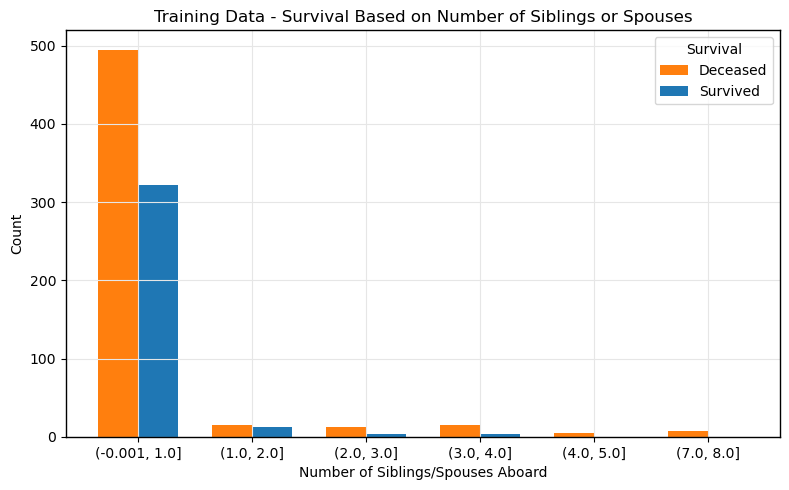

In [15]:
# Group and count values
count_data = ss.groupby(['sibling_spouse', 'survived'], observed=True).size().unstack(fill_value=0)

# Prepare x-axis positions
x = np.arange(len(count_data.index))
bar_width = 0.35
labels = count_data.index.tolist()

# Plot the graphh
fig, ax = plt.subplots(figsize=(8, 5))

# Bars for Deceased (survived == 0)
ax.bar(x - bar_width/2, count_data[0], width=bar_width, color='C1', label='Deceased')

# Bars for Survived (survived == 1)
ax.bar(x + bar_width/2, count_data[1], width=bar_width, color='C0', label='Survived')

# Labels, ticks, title
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel("Number of Siblings/Spouses Aboard")
ax.set_ylabel("Count")
ax.set_title("Training Data - Survival Based on Number of Siblings or Spouses")
ax.legend(title="Survival")

plt.tight_layout()
plt.show()

# we have added two new parameters for easy understanding
df['Family'] = df.Parch + df.SibSp
df['Is_Alone'] = df.Family == 0

<b> We won't consider Ticket feature as it gives no information regarding survival </b>

# Finally we studied about the Embarked Parameter
<b> Embarked signifies where the traveler boarded from. </b> There are three possible values for Embark - S,C,Q.
In combined data, more than 70% of the people boarded from S. Just under 20% boarded from C and the rest boarded from Q.
 <b> More People who boarded from C survived than those who died. </b>

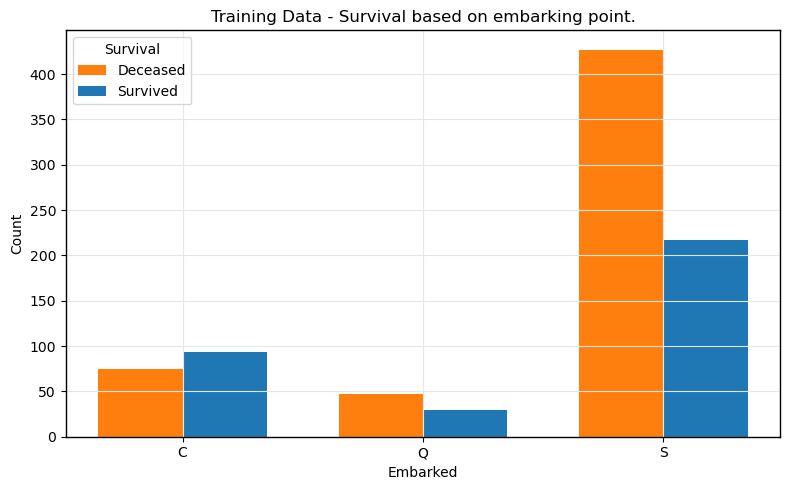

In [16]:
# Group and count values
count_data = titanic_data.groupby(['Embarked', 'Survived'], observed=True).size().unstack(fill_value=0)

# Prepare bar positions and labels
embarked_labels = count_data.index.tolist()
x = np.arange(len(embarked_labels))
bar_width = 0.35

# Create plot graph
fig, ax = plt.subplots(figsize=(8, 5))

# Bars for Deceased (Survived == 0)
ax.bar(x - bar_width/2, count_data[0], width=bar_width, color='C1', label='Deceased')

# Bars for Survived (Survived == 1)
ax.bar(x + bar_width/2, count_data[1], width=bar_width, color='C0', label='Survived')

# Step 4: Set labels and legend
ax.set_xticks(x)
ax.set_xticklabels(embarked_labels)
ax.set_xlabel("Embarked")
ax.set_ylabel("Count")
ax.set_title("Training Data - Survival based on embarking point.")
ax.legend(title="Survival")

plt.tight_layout()
plt.show()


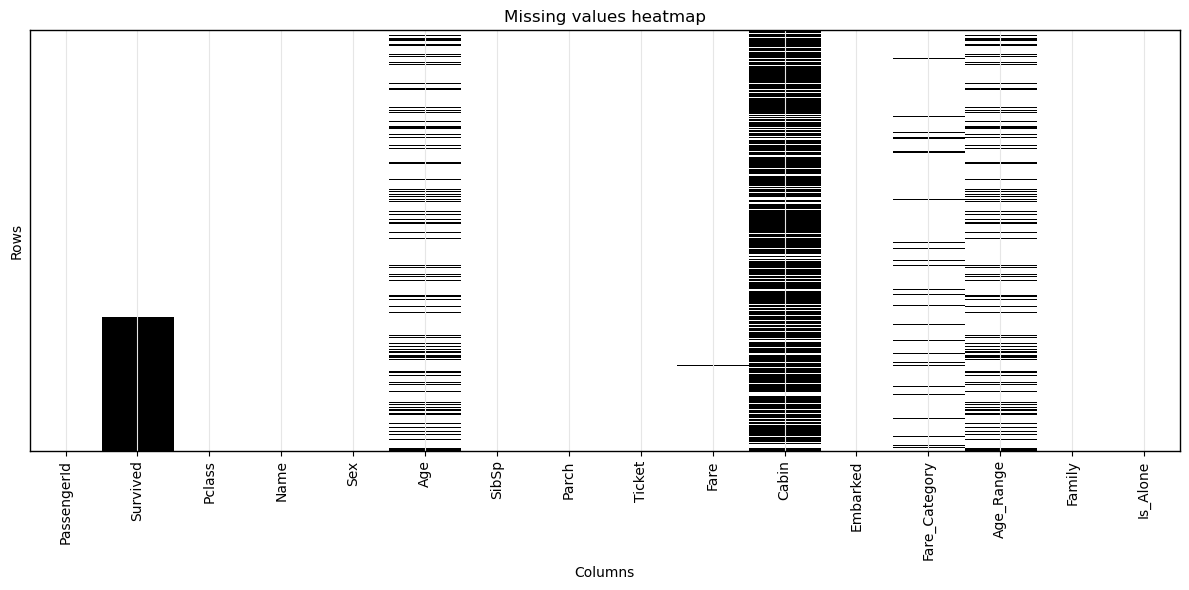

In [17]:
# Visualizes missing patterns and is shown by the white colour. we can see that the age and cabin has the missing data 
# the test data has the missing date of survival which we have to predict 
# Create a binary mask of missing values
missing_mask = df.isnull().values

# Plot with no interpolation and crisp edges
fig, ax = plt.subplots(figsize=(12, 6))
ax.imshow(missing_mask, aspect='auto', cmap='gray_r', interpolation='none')

# Set labels
ax.set_title("Missing values heatmap")
ax.set_xticks(np.arange(df.shape[1]))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticks([])
ax.set_xlabel("Columns")
ax.set_ylabel("Rows")

plt.tight_layout()
plt.show()


In [18]:
# Counts missing values per column (sum)
df.isnull().sum()

PassengerId         0
Survived          418
Pclass              0
Name                0
Sex                 0
Age               263
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin            1014
Embarked            2
Fare_Category      85
Age_Range         263
Family              0
Is_Alone            0
dtype: int64

There were a few columns in the dataset with missing values.  <b> There were 1014 missing values for the "Cabin" attribute.  There were two missing values in the "Embarked" column, which showed the commuter's boarding location.  There were 263 missing values in the property "Age," and one in the column "Fare."</b>

# DATA IMPUTATION
Data imputation is a method for retaining the majority of the dataset's data and information by substituting missing data with a different value
# Firstly we will impute the Age 
Age has 263 missing values. To deal with missing values, we first try to categorise the people with their titles. <b> There are 17 different titles in the training data.</b> We group the titles and sex and then <b>  we find the median of all the categories and replace the missing values with the median of that category. </b>

In [19]:

df['Salutation'] = df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip()) 
df.Salutation.nunique()
df.Salutation.value_counts()

Salutation
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
Don               1
Sir               1
Lady              1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [21]:
# grouped median imputation is used for the age imputation
grp = df.groupby(['Sex', 'Pclass'])  
df.Age = grp.Age.apply(lambda x: x.fillna(x.median()))

# this is the backup in case any row is left 
df.Age.fillna(df.Age.median(), inplace=True)

# After that we will impute the Embarked 
Since embarked only has two missing values and <b> the highest number of people boarded are from S, the probablity of boarding from S is high. So, we fill the missing values with S. </b>  However, instead of manually putting in S, <b> we would find the mode of the Embarked column and substitute missing values with it. </b>

In [22]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


# Finally we will impute the cabin
<b> Assigning NA for non available cabin values. </b> 

In [23]:
df.Cabin = df.Cabin.fillna('NA')

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,Age_Range,Family,Is_Alone,Salutation
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,Low,"(20, 30]",1,False,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,High,"(30, 40]",1,False,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,Mid,"(20, 30]",0,True,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,High,"(30, 40]",1,False,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,Mid,"(30, 40]",0,True,Mr


# ENCODING


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Is_Alone'] = LabelEncoder().fit_transform(df['Is_Alone'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])
df['Fare_Category'] = LabelEncoder().fit_transform(df['Fare_Category'])
df['Salutation'] = LabelEncoder().fit_transform(df['Salutation'])
df['Age'] = LabelEncoder().fit_transform(df['Age'])
df['Age_Range'] = LabelEncoder().fit_transform(df['Age_Range'])
df['Pclass'] = LabelEncoder().fit_transform(df['Pclass'])



In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,Age_Range,Family,Is_Alone,Salutation
0,1,0.0,2,"Braund, Mr. Owen Harris",1,32,1,0,A/5 21171,7.2500,NA,2,2,2,1,0,12
1,2,1.0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,57,1,0,PC 17599,71.2833,C85,0,0,3,1,0,13
2,3,1.0,2,"Heikkinen, Miss. Laina",0,39,0,0,STON/O2. 3101282,7.9250,NA,2,3,2,0,1,9
3,4,1.0,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,53,1,0,113803,53.1000,C123,2,0,3,1,0,13
4,5,0.0,2,"Allen, Mr. William Henry",1,53,0,0,373450,8.0500,NA,2,3,3,0,1,12


# DROPPING COLUMNS

In [28]:
df.drop(['Cabin','Name', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)
     

In [29]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Fare_Category,Age_Range,Family,Is_Alone,Salutation
0,1,0.0,2,1,32,7.2500,2,2,2,1,0,12
1,2,1.0,0,0,57,71.2833,0,0,3,1,0,13
2,3,1.0,2,0,39,7.9250,2,3,2,0,1,9
3,4,1.0,0,0,53,53.1000,2,0,3,1,0,13
4,5,0.0,2,1,53,8.0500,2,3,3,0,1,12


# TRAINING

In [30]:

# Data to be predicted
X_to_be_predicted = df[df.Survived.isnull()]
X_to_be_predicted = X_to_be_predicted.drop(['Survived'], axis = 1)

#Training data
train_data = df
train_data = train_data.dropna()
feature_train = train_data['Survived']
label_train  = train_data.drop(['Survived'], axis = 1)
train_data.shape #891 x 28

(891, 12)

In [31]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Fare_Category,Age_Range,Family,Is_Alone,Salutation
0,1,0.0,2,1,32,7.2500,2,2,2,1,0,12
1,2,1.0,0,0,57,71.2833,0,0,3,1,0,13
2,3,1.0,2,0,39,7.9250,2,3,2,0,1,9
3,4,1.0,0,0,53,53.1000,2,0,3,1,0,13
4,5,0.0,2,1,53,8.0500,2,3,3,0,1,12


In [44]:
X_train = train_data[['Pclass', 'Sex', 'Age','Embarked','Fare_Category', 'Age_Range','Family','Is_Alone','Salutation']]
y_train = train_data['Survived']

In [45]:
X_train.head()

,Pclass,Sex,Age,Embarked,Fare_Category,Age_Range,Family,Is_Alone,Salutation
0,2,1,32,2,2,2,1,0,12
1,0,0,57,0,0,3,1,0,13
2,2,0,39,2,3,2,0,1,9
3,0,0,53,2,0,3,1,0,13
4,2,1,53,2,3,3,0,1,12


In [46]:
X_to_be_predicted.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Fare_Category,Age_Range,Family,Is_Alone,Salutation
891,892,2,1,52,7.8292,1,2,3,0,1,12
892,893,2,0,69,7.0000,2,2,4,1,0,13
893,894,1,1,86,9.6875,1,3,6,0,1,12
894,895,2,1,41,8.6625,2,3,2,0,1,12
895,896,2,0,32,12.2875,2,3,2,2,0,13


In [47]:
X_test= X_to_be_predicted[['Pclass', 'Sex', 'Age','Embarked','Fare_Category', 'Age_Range','Family','Is_Alone','Salutation']]

In [48]:
X_test.head()

,Pclass,Sex,Age,Embarked,Fare_Category,Age_Range,Family,Is_Alone,Salutation
891,2,1,52,1,2,3,0,1,12
892,2,0,69,2,2,4,1,0,13
893,1,1,86,1,3,6,0,1,12
894,2,1,41,2,3,2,0,1,12
895,2,0,32,2,3,2,2,0,13


# NAIVE BAYES ALGORITHM
It is a classification technique based on Baye's theorem with an assumption of independence among predictors.
P( y | x ) = { P( y ) * P( x | y ) } / P( x )
where, x = input
       y = output

P( y | x ) - posterior (probability of output given that what is input)

P( y ) - likelihood (probability of output occurence) 

P( x | y ) - prior (probability of input given that what is output)

P( x ) - evidence  (probability of data point occurence) 

In [49]:
import numpy as np

class NaiveBayes:
    def __init__(self):
        self.priors = {}
        self.posteriors = {}
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.classes = np.unique(y)
        
        for c in self.classes:
            X_c = X[y == c]
            self.priors[c] = X_c.shape[0] / float(num_samples)
            
            for feature in range(num_features):
                mean = X_c[:, feature].mean()
                std = X_c[:, feature].std()
                self.posteriors[(feature, c)] = {
                    'mean': mean,
                    'std': std if std > 1e-6 else 1e-6  # Prevent div-by-zero
                }
    
    def predict(self, X):
        predictions = [self._predict_single(x) for x in X]
        return np.array(predictions)
    
    def _predict_single(self, x):
        class_probs = []
        
        for c in self.classes:
            log_prob = np.log(self.priors[c])
            
            for feature_idx in range(len(x)):
                mean = self.posteriors[(feature_idx, c)]['mean']
                std = self.posteriors[(feature_idx, c)]['std']
                log_prob += self.calculate_log_probability(x[feature_idx], mean, std)
            
            class_probs.append(log_prob)
        
        return self.classes[np.argmax(class_probs)]
    
    def calculate_log_probability(self, x, mean, std):
        return -0.5 * np.log(2 * np.pi * std ** 2) - ((x - mean) ** 2) / (2 * std ** 2)


In [50]:

# Create and train the Naive Bayes model
model1 = NaiveBayes()

# Make sure all values are numeric before training
X_train_numeric = X_train.select_dtypes(include=[np.number]).values
y_train_array = y_train.values

# Fit the model
model1.fit(X_train_numeric, y_train_array)

# Predict on training data
predictions = model1.predict(X_train_numeric)

# Calculate accuracy
accuracy = np.mean(predictions == y_train_array)
print('Accuracy on Training Set:', accuracy)


Accuracy on Training Set: 0.7957351290684624


In [51]:
# Predictions are done on this model
predictions = model1.predict(X_test.values)

In [52]:
submission = pd.DataFrame({'PassengerId':X_to_be_predicted.PassengerId,'Survived':predictions})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Assignment_01_NB_Predictions.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

(418, 2)
Saved file: Assignment_01_NB_Predictions.csv


# K-NEAREST NEIGHBOURS (KNN) ALGORITHM
It is the most easy and simplest algorithm for classification.
"Majority wins" 
The KNN algorithm assumes that similar things exist in close proximity. In other words, the class of a new point is determined by majority of nearest k things.

In [72]:
class KNN:
    def __init__(self, k=1):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        num_samples = X.shape[0]
        y_pred = np.zeros(num_samples, dtype=int)
        
        for i in range(num_samples):
            distances = np.sqrt(np.sum((self.X_train - X[i])**2, axis=1))
            sorted_indices = np.argsort(distances)
            k_nearest_labels_f = self.y_train[sorted_indices[:self.k]]             ## float array
            k_nearest_labels = [int(x) for x in k_nearest_labels_f]                ## array converted to type int
            y_pred[i] = np.argmax(np.bincount(k_nearest_labels))

        ## other way could be using np.linalg.norm to compute distances
        
        return y_pred

In [73]:
X_train = X_train[['Pclass', 'Sex', 'Age','Embarked','Fare_Category', 'Age_Range','Is_Alone','Salutation']]

In [74]:
X_train.head()

,Pclass,Sex,Age,Embarked,Fare_Category,Age_Range,Is_Alone,Salutation
0,2,1,32,2,2,2,0,12
1,0,0,57,0,0,3,0,13
2,2,0,39,2,3,2,1,9
3,0,0,53,2,0,3,0,13
4,2,1,53,2,3,3,1,12


In [75]:
X_test = X_test[['Pclass', 'Sex', 'Age','Embarked','Fare_Category', 'Age_Range','Is_Alone','Salutation']]

In [78]:
# Create and train the KNN model
model2 = KNN(k=1)
model2.fit(X_train.values, y_train.values)

In [79]:

# Accuracy on the train set
predictions2 = model2.predict(X_train.values)
accuracy = np.mean(predictions2 == y_train.values)
print('Accuracy:', accuracy)

Accuracy: 0.9225589225589226


In [80]:
# Predictions on test set
predictions2 = model2.predict(X_test.values)

In [81]:
submission2 = pd.DataFrame({'PassengerId':X_to_be_predicted.PassengerId,'Survived':predictions2})
submission2.Survived = submission2.Survived.astype(int)
print(submission2.shape)
filename = 'Assignment_01_KNN_Predictions.csv'
submission2.to_csv(filename,index=False)
print('Saved file: ' + filename)

(418, 2)
Saved file: Assignment_01_KNN_Predictions.csv
